<a href="https://colab.research.google.com/github/ANKIT3046/datascience_mlproject/blob/supervised_ml/supervised_ml_on_titanic_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#linear algebra
import numpy as np

# data processing
import pandas as pd

# data Visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Algorithms

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [0]:
titanic=pd.read_csv('train.csv')
titanic_test=pd.read_csv('test.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


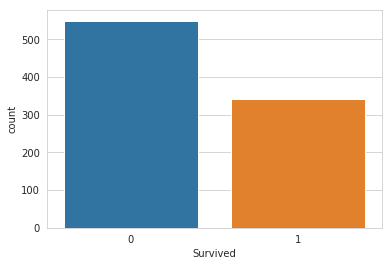

In [5]:
sb.set_style('whitegrid')
sb.countplot(x='Survived',data=titanic)

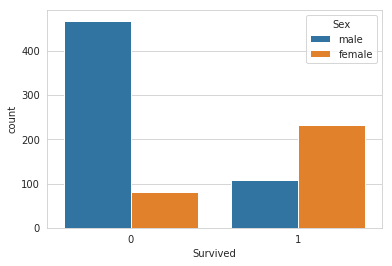

In [6]:
sb.countplot(x='Survived',hue='Sex',data=titanic)

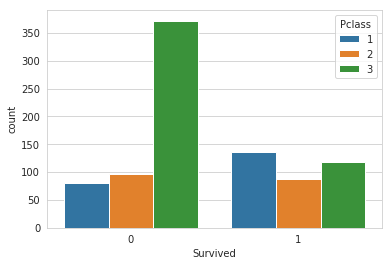

In [7]:
#ploting graph for Survived on the basis of passenger class
sb.countplot(x='Survived',hue='Pclass',data=titanic)

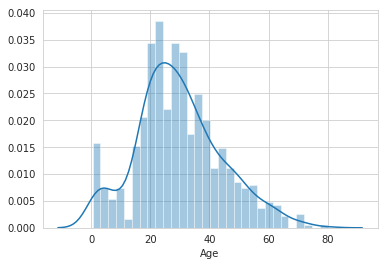

In [8]:
#ploting distribution graph on age column
sb.distplot(titanic['Age'].dropna(),bins=30)

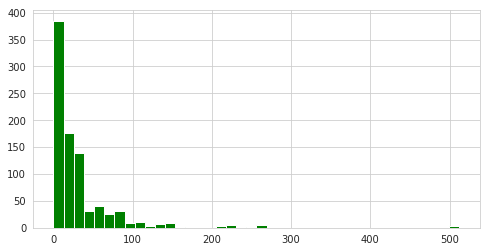

In [9]:
# ploting with fare column
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

# it is right skewed

## data cleaning
### let's do some data cleaning we have to fill in the missing values in tha age column and then take care of the Cabin column

### lets fill in the missing values of the age column. we can do this by taking the mean of the age.the smarter way will be to fill in the missing blanks with the mean of the Pclass they belong to

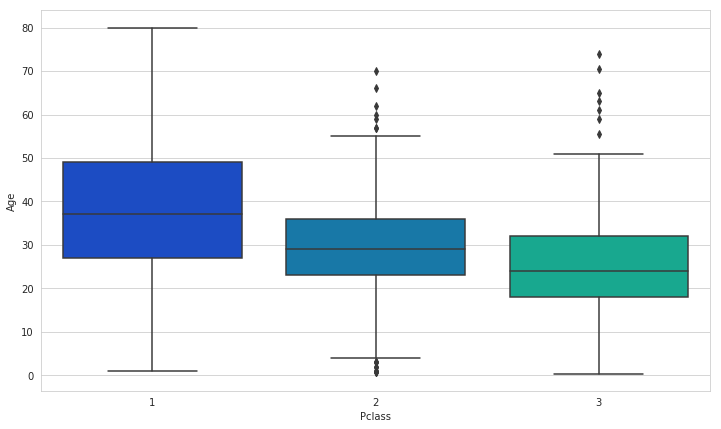

In [10]:
plt.figure(figsize=(12,7))
sb.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [0]:
# we will use these avg age values to impute based on Pclass for Age from above boxplot

def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age


titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)
  

In [0]:
def impute_cabin(col):
  Cabin = col[0]
  if type(Cabin) == str:
    return 1
  else:
    return 0

titanic['Cabin'] = titanic[['Cabin']].apply(impute_cabin, axis = 1)

In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [0]:
dataset=titanic

In [0]:
sex=pd.get_dummies(dataset['Sex'],drop_first=True)
embark=pd.get_dummies(dataset['Embarked'],drop_first=True)
dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
dataset=pd.concat([dataset,sex,embark],axis=1)

In [17]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1


In [0]:
X_train, X_test, Y_train, y_test = train_test_split(dataset.drop('Survived',axis=1),dataset['Survived'], test_size=0.25,random_state=101)

In [0]:
clf=DecisionTreeClassifier()
clf1=KNeighborsClassifier(n_neighbors=3)

In [0]:
train=clf.fit(X_train,Y_train)
train1=clf1.fit(X_train,Y_train)


In [25]:
pred=train.predict(X_test)
pred1=train1.predict(X_test)
print(pred)
print(pred1)

[0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1
 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1
 0]
[0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 1]


In [26]:
accu=accuracy_score(y_test,pred)
accu1=accuracy_score(y_test,pred1)
print(accu)
print(accu1)

0.7130044843049327
0.6188340807174888


In [0]:
from sklearn.linear_model import LogisticRegression

In [28]:
reg=LogisticRegression()
l=reg.fit(X_train,Y_train)
pred=l.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
print(accuracy_score(y_test,pred))

0.757847533632287
